# silx IO modules

silx currently mainly provides modules to read SPEC data files.  In a future release, the number of supported data formats will increase significantly by adding an optional dependency to the *FabIO* library.

A SPEC file can be converted into a HDF5 file.

*silx* has modules and functions to save configuration data stored in Python dictionaries to various formats (HDF5, INI, JSON).

It also provides a `save1D` function to save curves (1D numpy arrays) to simple file formats.





## SPEC files

There are currently 3 modules handling SPEC file reading:

  - `silx.io.specfile`: Low-level wrapping of the legacy C library
  - `silx.io.specfilewrapper`: Second layer of wrapping to offer compatibility with the legacy PyMca wrapper
  - `silx.io.spech5`: High-level module exposing a Spec file like a *h5py* file.

The use of `specfilewrapper` should be strictly limited to the case of existing programs using the PyMca wrapper, to switch to silx with minimal work: replacing the import statement `from PyMca5.PyMcaIO import specfilewrapper` with `from silx.io import specfilewrapper`. 

New programs should use `specfile` or (preferably) `spech5`. 

We encourage using of `spech5`, because it provides the same interface that `h5py` uses for reading HDF5 files. The stated goal of *silx* regarding IO is to provide a unified API to as many data formats as possible, to simplify training.

A fourth module related to SPEC file deals with conversion of SPEC files into HDF5 files: `silx.io.spectoh5`

### spech5

Documentation: 
http://www.silx.org/doc/silx/dev/modules/io/spech5.html

#### Exposed structure

    /
        1.1/
            title = "…"
            start_time = "…"
            instrument/
                specfile/
                    file_header = "…"
                    scan_header = "…"
                positioners/
                    motor_name = value
                    …
                mca_0/
                    data = …
                    calibration = …
                    channels = …
                    preset_time = …
                    elapsed_time = …
                    live_time = …

                mca_1/
                    …
                …
            measurement/
                colname0 = …
                colname1 = …
                …
                mca_0/
                     data -> /1.1/instrument/mca_0/data
                     info -> /1.1/instrument/mca_0/
                …
        2.1/
            …
 
#### Opening a Spec file and listing all scans

Like a *h5py* file, a SPEC file is composed of a tree structure of groups (~folders) and datasets (~files).

The root group contains one subgroup per scan.


In [1]:
from silx.io import spech5

sfh5 = spech5.SpecH5("data/31oct98.dat")

#print a list of scans
print(sfh5.keys())


['19.1', '20.1', '21.1', '22.1', '23.1', '24.1', '25.1', '26.1', '27.1', '28.1', '29.1', '30.1', '31.1', '32.1', '33.1', '34.1', '35.1', '36.1', '37.1', '38.1', '39.1', '40.1', '41.1', '42.1', '43.1', '44.1', '45.1', '46.1', '47.1', '48.1', '49.1', '50.1', '51.1', '52.1', '53.1', '54.1', '55.1', '56.1', '57.1', '58.1', '59.1', '60.1', '61.1', '62.1', '63.1', '64.1', '65.1', '66.1', '67.1', '68.1', '69.1', '678.1', '679.1', '680.1', '681.1', '682.1', '684.1', '685.1', '687.1', '688.1', '700.1', '688.2', '688.3']


#### Accessing detector measurements

Measurements are 1D datasets (data columns in a scan in the original file). They are located in a sub-group of your scan named "measurement". 

You can iterate over all keys in a SpecH5Group. Each key is the name of a subgroup or a dataset.

In [2]:
# print all detector labels in all scans
for scan_key in sfh5:
    scan_group = sfh5[scan_key]
    print("####scan number " + scan_key + "####")
    if scan_key.startswith("6"):
        print(scan_group["measurement"].keys())

####scan number 19.1####
####scan number 20.1####
####scan number 21.1####
####scan number 22.1####
####scan number 23.1####
####scan number 24.1####
####scan number 25.1####
####scan number 26.1####
####scan number 27.1####
####scan number 28.1####
####scan number 29.1####
####scan number 30.1####
####scan number 31.1####
####scan number 32.1####
####scan number 33.1####
####scan number 34.1####
####scan number 35.1####
####scan number 36.1####
####scan number 37.1####
####scan number 38.1####
####scan number 39.1####
####scan number 40.1####
####scan number 41.1####
####scan number 42.1####
####scan number 43.1####
####scan number 44.1####
####scan number 45.1####
####scan number 46.1####
####scan number 47.1####
####scan number 48.1####
####scan number 49.1####
####scan number 50.1####
####scan number 51.1####
####scan number 52.1####
####scan number 53.1####
####scan number 54.1####
####scan number 55.1####
####scan number 56.1####
####scan number 57.1####
####scan number 58.1####


Datasets are objects that are similar to numpy arrays (or h5py datasets). You can access the individual values using indices, or extract subarrays using slicing.

In [3]:
# get two data columns
xdata = sfh5["/22.1/measurement/TZ3"]
ydata = sfh5["/22.1/measurement/If4"]

print(xdata)
print(sfh5["/22.1/measurement/TZ3"][5:8])

[ 29.29999924  29.30397606  29.30795288  29.31202888  29.3160038
  29.31998062  29.32395554  29.32803154  29.33200836  29.33598328
  29.3399601   29.3440361   29.34801292  29.35198784  29.35596466
  29.36004066  29.36401558  29.3679924   29.37196732  29.37604332
  29.38002014  29.38399506  29.38797188  29.39204788  29.3960247
  29.39999962  29.40397644  29.40795135  29.41202736  29.41600418
  29.4199791   29.42395592  29.42803192  29.43200874  29.43598366
  29.43996048  29.44403648  29.4480114   29.45198822  29.45596313
  29.46003914  29.46401596  29.46799278  29.4719677   29.4760437
  29.48002052  29.48399544  29.48797226  29.49204826  29.49602318  29.5
  29.50397682  29.50795174  29.51202774  29.51600456  29.51997948
  29.5239563   29.5280323   29.53200722  29.53598404  29.53996086
  29.54403687  29.54801178  29.5519886   29.55596352  29.56003952
  29.56401634  29.56799126  29.57196808  29.57604408  29.5800209
  29.58399582  29.58797264  29.59204865  29.59602356  29.60000038
  29.603

Populating the interactive namespace from numpy and matplotlib


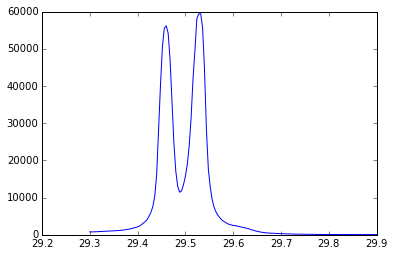

In [4]:
%pylab inline
plot(xdata, ydata)

#### Accessing MCA data

mca data can be found in `/94.1/measurement/mca_0/data` or `/94.1/instrument/mca_0/data`. This is a 2D array with all spectra recorded for one analyser during a scan. If there are more than one analyser, you will find more groups (`mca_1`, `mca_2`...)

Scan metadata (headers) can be found in `mca_0/info`.

['data', 'info']
(21, 1024)


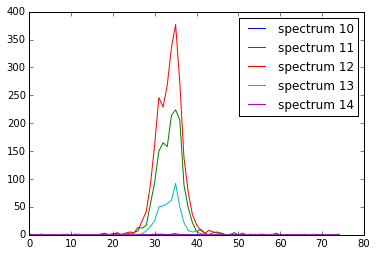

In [5]:
sfh5_2 = spech5.SpecH5("data/oleg.dat")
scan94_mca0 = sfh5_2["94.1/measurement/mca_0"]
print(scan94_mca0.keys())
mca_data = scan94_mca0["data"]
print(mca_data.shape)
for i, mca_spectrum in enumerate(mca_data[10:15]):
    plot(mca_spectrum[475:550], label="spectrum %d" % (10 + i))
legend()

In [6]:
mca_info = scan94_mca0["info"]
print(mca_info.keys())
for datasatet_name in mca_info:
    print("dataset %s: %s" % (datasatet_name, mca_info[datasatet_name]))

['data', 'calibration', 'channels']
dataset data: [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
dataset calibration: [ 0.  1.  0.]
dataset channels: [   0    1    2 ..., 1021 1022 1023]


## save1D

The formats supported by save1D are:

- `.csv` 
- `.npy` (format used by `numpy.save` / `numpy.load`)
- `.txt` (CSV with customized header, footer and record separator)
- `.dat` (simplified SPEC file, one scan with two columns per curve)

For example, you can save the data loaded previously as txt:

In [7]:
from silx.io.utils import save1D

hdr = "This is data extracted from a Spec file"
ftr = "My custom footer"

save1D("data/If4_TZ3.txt", x=xdata, y=ydata, xlabel="TZ3", ylabels=["If4"], csvdelim="\t", header=hdr, footer=ftr)

``y`` can be a 2D array in case you want to save multiple curves to a single file. That's why `ylabels` is formatted as a list of labels.

## config dict

Python dictionaries are very convenient to handle configuration data for a program. The `silx.io.dictdump` and `silx.io.configdict` modules address the issue of dumping dictionaries to files and loading them back.

In [8]:
from silx.io.dictdump import load, dump
import numpy


mydic0 = {
        'simple_types': {
            'float': 1.0,
            'int': 1,
            'string': 'Hello World',
        },
        'containers': {
            'list': [-1, 'string', 3.0, False],
            'array': numpy.array([1.0, 2.0, 3.0]),
            'dict': {
                'key1': 'Hello World',
                'key2': 2.0,
            }
        }
}

# dump(mydic0, "mydic.json")
# dump(mydic0, "mydic.h5")
dump(mydic0, "data/mydic.ini")

In [9]:
# mydic1 = load("mydic.json")
# mydic1 = load("mydic.h5")
mydic1 = load("data/mydic.ini")

print(mydic1)

ConfigDict([('containers', OrderedDict([('list', [-1, 'string', 3.0, False]), ('array', array([ 1.,  2.,  3.])), ('dict', OrderedDict([('key1', 'Hello World'), ('key2', 2.0)]))])), ('simple_types', OrderedDict([('float', 1.0), ('int', 1), ('string', 'Hello World')]))])


The JSON format cannot serialize numpy arrays. Except for this drawback, it is a very common and convenient ascii format to handle simple python data.

The HDF5 format handles numpy arrays very well, but data types are not preserved in heterogeneous lists (lists containing a mix of strings, integers...), all elements are cast into byte strings for these lists. 

The INI format handles all data types well in our example. Its drawback is that the INI format is not standardized, and the INI files produced by `silx.configdict`, that are designed to handle nested configuration dictionaries, are not commonly read by other libraries than silx.

# spectoh5

The `silx.io.spectoh5` module provides 2 functions to convert SPEC files to HDF5 files:
 - `convert()`: simple function to convert a file
 - `write_spec_to_h5()`: function with more customization options, such as specifying a target path/group inside the output HDF5 file where scans will be written.  

The documentation for these functions is:
 - http://www.silx.org/doc/silx/dev/modules/io/spectoh5.html#silx.io.spectoh5.convert
 - http://www.silx.org/doc/silx/dev/modules/io/spectoh5.html#silx.io.spectoh5.write_spec_to_h5

## Exercise

1. Convert a SPEC file into an HDF5 file, and list it's content with `silx.io.utils.h5ls`
2. Write two different SPEC files into a single HDF5 file, into 2 separate target groups.
3. Redo question 1. or 2., with auto-chunking and gzip compression

Tips:
 - documentation for `h5ls`: http://www.silx.org/doc/silx/dev/modules/io/utils.html#silx.io.utils.h5ls
 - additional documentation for question 3.: 
   + http://docs.h5py.org/en/latest/high/group.html#Group.create_dataset
   + http://docs.h5py.org/en/latest/high/dataset.html#dataset-compression

In [ ]:
# Question 1.

from silx.io.spectoh5 import convert
from silx.io.utils import h5ls

convert("data/oleg.dat", "data/oleg.h5", mode="w")
print(h5ls("data/oleg.h5"))

In [ ]:
# Question 2.

from silx.io.spectoh5 import write_spec_to_h5
from silx.io.utils import h5ls

# specifying a path causes the file to be open,
# then closed again after writing is done
write_spec_to_h5("data/spectrum.dat", "data/concat.h5",
                 h5path="/spectrum", mode="w")
write_spec_to_h5("data/oleg.dat", "data/concat.h5",
                 h5path="/oleg", mode="a")

# alternative way: use a file handle rather than a file path
# (you are responsible for opening/closing the file)
import h5py

output_file = h5py.File("data/concat.h5", mode="a")
write_spec_to_h5("data/spectrum.dat", output_file,
                 h5path="/spectrum", overwrite_data=True)
write_spec_to_h5("data/oleg.dat", output_file,
                 h5path="/oleg_2")

print(h5ls(output_file))

output_file.close()

In [ ]:
# Question 3.
from silx.io.spectoh5 import convert
from silx.io.utils import h5ls

create_ds_args = {"chunks": True,
                  "compression": "gzip"}

convert("data/oleg.dat", "data/oleg.h5", mode="w",
        create_dataset_args=create_ds_args)
print(h5ls("data/oleg.h5"))
